In [376]:
import pandas as pd
from typing import List
from pandas import DataFrame
from tabulate import tabulate
import os
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [377]:
def concat_path(folder_name, file_name):
  return os.path.join(folder_name, file_name)

In [378]:
def current_dir(dir_target: str) -> str:
  current_dir = os.getcwd()
  folder_path = concat_path(current_dir, dir_target)
  return folder_path

In [379]:
def get_csv_files(folder_name: str) -> List[str]:
  running_folder_path = current_dir(folder_name)
  files_in_running_folder = os.listdir(running_folder_path)
  files = sorted([concat_path(running_folder_path, file) for file in files_in_running_folder])

  return files

In [380]:
def edit_date_format(date: str):
  date_split = date.split(' ')
  del date_split[3]
  new_date_format = ' '.join(date_split)

  return new_date_format.strip()

In [381]:
def rename_column(df: DataFrame, old_name: str, new_name: str) -> None:
  df.rename(columns={old_name: new_name}, inplace=True)

In [382]:
def drop_column(df: DataFrame, column: str) -> None:
  df.drop(columns=[column], inplace=True)

In [383]:
def sec_to_min(sec):
    if pd.isna(sec) or not isinstance(sec, (int, float)):  # Check for NaN or non-numeric values
        return "0"
    
    sec = float(sec)  # Ensure sec is a float before calculations
    min = int(sec // 60)
    sec = int(sec % 60)

    return f"{min}:{sec:02d}"


sec_to_min(336.572727)


'5:36'

In [384]:
def convert_activity(activity):
  if (activity == 'Running (Indoor)'):
    return 'indoor'
  return 'outdoor'

In [385]:
def filter_interval_400m(df: DataFrame):
  return df[(df['Distance(km)'] >= 0.38) & (df['Distance(km)'] <= 0.43)]

In [386]:
def filter_interval_1k(df: DataFrame):
  return df[(df['Distance(km)'] >= 1) & (df['Distance(km)'] <= 1.1)]

In [387]:
def filter_interval_1_2k(df: DataFrame):
  return df[(df['Distance(km)'] >= 1.2) & (df['Distance(km)'] <= 1.35)]

In [388]:
def filter_interval_2k(df: DataFrame):
  return df[(df['Distance(km)'] >= 2) & (df['Distance(km)'] <= 2.25)]

In [389]:
def filter_5K(df: DataFrame):
  return df[(df['Distance(km)'] >= 4.99) & (df['Distance(km)'] <= 5.1) ]

In [390]:
def filter_7K(df: DataFrame):
  return df[(df['Distance(km)'] >= 7) & (df['Distance(km)'] <= 7.1) ]

In [391]:
def filter_10K(df: DataFrame):
  return df[(df['Distance(km)'] >= 10) & (df['Distance(km)'] <= 10.1)]

In [392]:
def filter_longrun(df: DataFrame):
  return df[(df['Distance(km)'] >= 10.5)]

In [393]:
def only_date(date: str):
  return date[:10]

In [394]:
def only_month(date: str):
  month = date[5:7]
  return month  

In [395]:
def date_selector(df: DataFrame, date: str) -> DataFrame:
  return df[df['Date'].astype(str).str.contains(date)]

In [396]:
def mean_column(df: DataFrame, column: str):
  return round(df[column].mean(), 2)

In [397]:
d = '2566-10-02 18:20:31 - 2566-10-02 18:39:08'
a = list(set(d.split(' ')))
k = [i for i in a if i != '-']

t = '-'.join(k[:2])
v = f'{t} {k[2]}'
v


'2566-10-02-18:20:31 18:39:08'

In [398]:
runningcsv_files = get_csv_files('running')

df = pd.concat( 
  map(pd.read_csv, runningcsv_files), 
  ignore_index=True
)

df.fillna(0, inplace=True)
df = df[df['Distance(km)'] != 0]

rename_column(df, 'Active energy burned(kcal)', 'Energy (kcal)')
rename_column(df, 'Heart rate: Average(count/min)', 'Heart rate: Average(min)')
rename_column(df, 'Heart rate: Maximum(count/min)', 'Heart rate: Maximum(min)')

drop_columns = [
  'Heart rate zone: A Easy (<115bpm)(%)',
  'Heart rate zone: B Fat Burn (115-135bpm)(%)',
  'Heart rate zone: C Moderate Training (135-155bpm)(%)',
  'Heart rate zone: D Hard Training (155-175bpm)(%)',
  'Heart rate zone: E Extreme Training (>175bpm)(%)',
  'Elevation: Ascended(m)',
  'Elevation: Maximum(m)',
  'Elevation: Minimum(m)',
  'METs Average(kcal/hr·kg)',
  'Weather: Humidity(%)',
  'Weather: Temperature(degC)',
]

for column in drop_columns:
  drop_column(df, column)

df['Pace(sec)'] = df['Duration(s)'] / df['Distance(km)']
df['Pace(min)'] = df['Pace(sec)'].apply(sec_to_min)
df['Activity'] = df['Activity'].apply(convert_activity)
df['Date'] = df['Date'].apply(edit_date_format)
df['Duration(min)'] = df['Duration(s)'].apply(sec_to_min)

column_order = ['Date', 'Energy (kcal)', 'Activity', 'Distance(km)', 'Duration(min)', 'Pace(min)', 'Heart rate: Average(min)', 'Heart rate: Maximum(min)']
d = df[column_order]

d



,Date,Energy (kcal),Activity,Distance(km),Duration(min),Pace(min),Heart rate: Average(min),Heart rate: Maximum(min)
0,2566-10-02 18:20:31 - 18:39:08,183.992,indoor,3.300,18:30,5:36,164.525,182.0
1,2566-10-03 18:34:49 - 19:03:43,267.510,indoor,4.631,28:14,6:06,166.159,197.0
2,2566-10-04 18:09:39 - 18:53:54,434.123,indoor,7.388,38:18,5:11,158.990,189.0
3,2566-10-05 10:06:21 - 10:34:35,306.220,indoor,5.565,27:54,5:00,160.902,183.0
4,2566-10-05 17:32:16 - 17:40:01,80.592,indoor,1.488,7:42,5:10,176.280,188.0
...,...,...,...,...,...,...,...,...
603,2568-03-30 18:21:39 - 18:22:55,20.603,outdoor,0.413,1:16,3:04,0.000,0.0
604,2568-03-30 18:24:50 - 18:26:09,20.360,outdoor,0.417,1:19,3:09,0.000,0.0
605,2568-03-30 18:28:59 - 18:30:17,20.580,outdoor,0.409,1:18,3:10,152.000,152.0
606,2568-03-30 18:33:01 - 18:34:20,21.950,outdoor,0.408,1:19,3:13,0.000,0.0


In [399]:
def filter_value(df: DataFrame, column: str, value: str) -> DataFrame:
  return df[df[column] == value]

In [400]:
outdoor = filter_value(df, 'Activity', 'outdoor')
outdoor.reset_index()[column_order]

,Date,Energy (kcal),Activity,Distance(km),Duration(min),Pace(min),Heart rate: Average(min),Heart rate: Maximum(min)
0,2566-10-07 07:57:08 - 08:17:11,179.592,outdoor,3.041,17:39,5:48,167.339,179.0
1,2566-10-14 17:30:23 - 17:58:10,253.719,outdoor,4.017,19:50,4:56,162.639,186.0
2,2566-10-21 17:57:09 - 18:16:47,147.069,outdoor,2.090,10:58,5:15,143.814,178.0
3,2566-10-23 08:02:10 - 08:31:26,267.240,outdoor,4.104,22:38,5:31,154.657,175.0
4,2566-10-30 17:41:32 - 18:15:11,291.367,outdoor,4.016,21:38,5:23,166.435,191.0
...,...,...,...,...,...,...,...,...
517,2568-03-30 18:21:39 - 18:22:55,20.603,outdoor,0.413,1:16,3:04,0.000,0.0
518,2568-03-30 18:24:50 - 18:26:09,20.360,outdoor,0.417,1:19,3:09,0.000,0.0
519,2568-03-30 18:28:59 - 18:30:17,20.580,outdoor,0.409,1:18,3:10,152.000,152.0
520,2568-03-30 18:33:01 - 18:34:20,21.950,outdoor,0.408,1:19,3:13,0.000,0.0


In [401]:
indoor = filter_value(df, 'Activity', 'indoor')
indoor.reset_index()[column_order]

,Date,Energy (kcal),Activity,Distance(km),Duration(min),Pace(min),Heart rate: Average(min),Heart rate: Maximum(min)
0,2566-10-02 18:20:31 - 18:39:08,183.992,indoor,3.300,18:30,5:36,164.525,182.0
1,2566-10-03 18:34:49 - 19:03:43,267.510,indoor,4.631,28:14,6:06,166.159,197.0
2,2566-10-04 18:09:39 - 18:53:54,434.123,indoor,7.388,38:18,5:11,158.990,189.0
3,2566-10-05 10:06:21 - 10:34:35,306.220,indoor,5.565,27:54,5:00,160.902,183.0
4,2566-10-05 17:32:16 - 17:40:01,80.592,indoor,1.488,7:42,5:10,176.280,188.0
...,...,...,...,...,...,...,...,...
80,2568-03-11 19:11:52 - 19:26:11,98.334,indoor,2.502,14:19,5:43,126.000,126.0
81,2568-03-11 19:31:35 - 19:41:37,95.813,indoor,2.671,10:02,3:45,157.000,157.0
82,2568-03-11 19:46:57 - 19:57:00,88.163,indoor,2.675,10:03,3:45,153.000,153.0
83,2568-03-11 20:05:00 - 20:15:05,87.700,indoor,2.684,10:05,3:45,142.000,142.0


In [402]:
filter_interval_400m(df)

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
97,2567-02-17 18:24:30 - 18:28:02,22.642,outdoor,0.399,76.541,166.520,194.0,191.832080,3:11,1:16
226,2567-08-30 07:01:31 - 07:03:11,23.133,outdoor,0.426,81.541,188.500,194.0,191.410798,3:11,1:21
228,2567-08-30 07:10:30 - 07:13:10,23.223,outdoor,0.413,82.937,175.429,189.0,200.815981,3:20,1:22
229,2567-08-30 07:16:18 - 07:17:48,23.110,outdoor,0.426,82.536,0.000,0.0,193.746479,3:13,1:22
230,2567-08-30 07:22:47 - 07:24:38,22.770,outdoor,0.406,83.054,181.500,185.0,204.566502,3:24,1:23
...,...,...,...,...,...,...,...,...,...,...
602,2568-03-30 18:18:00 - 18:19:22,20.752,outdoor,0.417,82.000,0.000,0.0,196.642686,3:16,1:22
603,2568-03-30 18:21:39 - 18:22:55,20.603,outdoor,0.413,76.000,0.000,0.0,184.019370,3:04,1:16
604,2568-03-30 18:24:50 - 18:26:09,20.360,outdoor,0.417,79.000,0.000,0.0,189.448441,3:09,1:19
605,2568-03-30 18:28:59 - 18:30:17,20.580,outdoor,0.409,78.000,152.000,152.0,190.709046,3:10,1:18


In [403]:
filter_interval_1k(df)["Distance(km)"].sum()

np.float64(63.635000000000005)

In [404]:
filter_interval_1_2k(df)

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
180,2567-07-12 17:51:04 - 18:17:45,70.046,outdoor,1.307,514.876,119.886,154.0,393.937261,6:33,8:34
379,2568-01-07 17:54:57 - 17:59:33,66.075,outdoor,1.228,267.096,179.633,186.0,217.504886,3:37,4:27
380,2568-01-07 18:04:06 - 18:08:37,66.171,outdoor,1.234,268.409,180.406,188.0,217.511345,3:37,4:28
381,2568-01-07 18:13:10 - 18:17:46,68.903,outdoor,1.209,273.581,181.000,190.0,226.287014,3:46,4:33
382,2568-01-07 18:23:04 - 18:27:41,63.508,outdoor,1.256,270.848,184.568,191.0,215.643312,3:35,4:30
383,2568-01-07 18:38:30 - 18:43:09,68.423,outdoor,1.309,278.567,183.133,190.0,212.809015,3:32,4:38
384,2568-01-07 18:47:52 - 18:52:29,69.274,outdoor,1.305,271.121,174.625,177.0,207.755556,3:27,4:31
385,2568-01-07 18:57:32 - 19:02:09,67.947,outdoor,1.283,270.249,140.500,141.0,210.638348,3:30,4:30
386,2568-01-07 19:09:43 - 19:14:18,68.233,outdoor,1.260,266.223,186.467,197.0,211.288095,3:31,4:26
390,2568-01-10 18:07:08 - 18:11:31,66.954,outdoor,1.289,263.299,182.882,189.0,204.266098,3:24,4:23


In [405]:
filter_interval_2k(df)

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
18,2566-10-21 17:57:09 - 18:16:47,147.069,outdoor,2.090,658.899,143.814,178.0,315.262679,5:15,10:58
22,2566-10-25 10:21:52 - 10:52:46,147.595,indoor,2.139,749.817,129.842,168.0,350.545582,5:50,12:29
170,2567-06-22 18:24:11 - 18:41:40,107.515,outdoor,2.013,823.444,123.292,154.0,409.063090,6:49,13:43
199,2567-08-07 17:52:21 - 18:00:08,110.498,outdoor,2.031,465.636,176.570,185.0,229.264402,3:49,7:45
200,2567-08-07 18:05:59 - 18:14:24,110.093,outdoor,2.030,478.400,181.683,191.0,235.665025,3:55,7:58
201,2567-08-07 18:20:54 - 18:35:28,107.600,outdoor,2.019,474.281,167.378,190.0,234.908866,3:54,7:54
202,2567-08-07 18:36:20 - 18:44:19,109.150,outdoor,2.028,477.121,188.809,196.0,235.266765,3:55,7:57
203,2567-08-07 18:52:19 - 19:01:08,107.095,outdoor,2.013,484.349,185.566,194.0,240.610532,4:00,8:04
207,2567-08-14 18:08:55 - 18:16:50,106.121,outdoor,2.042,475.175,173.905,183.0,232.700784,3:52,7:55
208,2567-08-14 18:21:41 - 18:29:59,107.876,outdoor,2.024,479.365,180.800,190.0,236.840415,3:56,7:59


In [406]:
run5k = filter_5K(outdoor)
run5k

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
35,2566-11-13 17:34:55 - 18:06:49,273.554,outdoor,5.044,1858.161,163.325,176.0,368.390365,6:08,30:58
61,2566-12-28 07:37:58 - 08:07:19,266.105,outdoor,5.056,1464.858,142.500,161.0,289.726661,4:49,24:24
62,2566-12-28 17:44:22 - 18:11:36,266.066,outdoor,5.045,1477.712,168.188,178.0,292.906244,4:52,24:37
64,2567-01-02 07:28:04 - 07:54:03,267.671,outdoor,5.063,1487.952,164.318,174.0,293.887419,4:53,24:47
68,2567-01-06 17:45:50 - 18:12:15,268.547,outdoor,5.035,1359.984,181.058,201.0,270.106058,4:30,22:39
...,...,...,...,...,...,...,...,...,...,...
564,2568-03-01 18:10:13 - 18:27:44,330.349,outdoor,5.000,1051.000,147.000,147.0,210.200000,3:30,17:31
567,2568-03-04 17:48:26 - 18:14:48,281.140,outdoor,5.025,1582.000,132.333,140.0,314.825871,5:14,26:22
573,2568-03-06 18:36:33 - 19:01:22,285.735,outdoor,5.019,1489.000,140.000,157.0,296.672644,4:56,24:49
584,2568-03-13 17:03:11 - 17:27:35,317.546,outdoor,5.020,1464.000,140.500,148.0,291.633466,4:51,24:24


In [407]:
run7k = filter_7K(outdoor)
run7k

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
41,2566-11-22 17:17:00 - 18:06:44,361.793,outdoor,7.042,2549.349,161.180,174.0,362.020591,6:02,42:29
57,2566-12-22 17:40:06 - 18:13:32,374.418,outdoor,7.043,1966.304,180.819,187.0,279.185574,4:39,32:46
79,2567-01-20 17:53:21 - 18:26:55,374.721,outdoor,7.039,1987.794,172.833,184.0,282.397216,4:42,33:07
101,2567-02-25 17:51:05 - 18:23:58,377.729,outdoor,7.043,1917.996,186.358,198.0,272.326565,4:32,31:57
108,2567-03-09 17:59:04 - 18:31:08,375.394,outdoor,7.033,1886.370,175.895,191.0,268.216977,4:28,31:26
109,2567-03-10 17:57:45 - 18:29:11,377.391,outdoor,7.045,1875.851,181.804,192.0,266.266998,4:26,31:15
112,2567-03-15 18:15:23 - 18:48:50,376.427,outdoor,7.038,1959.521,178.816,186.0,278.420148,4:38,32:39
114,2567-05-03 18:21:18 - 19:01:59,373.897,outdoor,7.030,2343.601,172.104,194.0,333.371408,5:33,39:03
115,2567-05-05 18:20:32 - 19:15:29,377.770,outdoor,7.028,2156.188,164.770,194.0,306.799659,5:06,35:56
128,2567-05-25 18:23:31 - 19:14:44,371.488,outdoor,7.061,2072.546,156.806,193.0,293.520181,4:53,34:32


In [408]:
run10k = filter_10K(outdoor)
run10k

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
52,2566-12-16 17:26:05 - 18:16:58,563.603,outdoor,10.025,3028.179,181.844,192.0,302.062743,5:02,50:28
58,2566-12-23 17:24:30 - 18:13:01,529.661,outdoor,10.052,2848.219,182.775,194.0,283.348488,4:43,47:28
149,2567-06-07 17:56:23 - 19:08:14,539.981,outdoor,10.013,3513.891,161.056,179.0,350.932887,5:50,58:33
184,2567-07-17 17:47:12 - 18:56:46,532.442,outdoor,10.075,3125.050,153.784,198.0,310.178660,5:10,52:05
194,2567-08-02 06:44:35 - 07:44:34,571.590,outdoor,10.015,3199.652,160.694,191.0,319.485971,5:19,53:19
197,2567-08-06 18:05:22 - 19:00:02,539.658,outdoor,10.005,3275.234,153.855,193.0,327.359720,5:27,54:35
223,2567-08-22 17:24:33 - 18:34:00,550.113,outdoor,10.025,3570.027,154.648,173.0,356.112419,5:56,59:30
286,2567-11-04 16:31:14 - 17:30:46,559.908,outdoor,10.004,3275.073,167.492,200.0,327.376349,5:27,54:35
315,2567-11-26 17:14:48 - 18:08:36,683.426,outdoor,10.031,3227.944,172.793,192.0,321.796830,5:21,53:47
333,2567-12-06 16:23:51 - 17:23:42,557.056,outdoor,10.010,3591.585,144.189,153.0,358.799700,5:58,59:51


In [409]:
longrun = filter_longrun(outdoor)
longrun

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min)
152,2567-06-11 17:55:09 - 19:15:02,590.464,outdoor,10.632,3625.281,147.040,168.0,340.978273,5:40,60:25
159,2567-06-13 17:43:41 - 18:51:44,609.384,outdoor,10.551,3566.921,157.923,172.0,338.064733,5:38,59:26
162,2567-06-18 17:40:12 - 19:20:36,658.691,outdoor,12.017,4004.761,153.016,178.0,333.257968,5:33,66:44
169,2567-06-20 17:42:38 - 18:49:10,617.962,outdoor,11.029,3677.336,155.596,170.0,333.424245,5:33,61:17
181,2567-07-14 17:31:48 - 18:52:43,774.967,outdoor,13.250,4448.425,172.735,192.0,335.730189,5:35,74:08
186,2567-07-19 17:35:37 - 18:59:56,706.758,outdoor,13.010,4418.175,157.812,183.0,339.598386,5:39,73:38
193,2567-07-31 17:33:12 - 18:59:13,655.960,outdoor,11.832,4055.119,155.693,187.0,342.724730,5:42,67:35
195,2567-08-04 17:21:36 - 18:36:47,714.014,outdoor,12.017,4003.836,163.089,182.0,333.180994,5:33,66:43
214,2567-08-18 06:27:42 - 07:36:14,666.650,outdoor,12.041,3983.937,151.347,174.0,330.864297,5:30,66:23
231,2567-08-30 17:18:18 - 18:48:51,913.559,outdoor,16.242,5406.378,157.813,188.0,332.864056,5:32,90:06


In [410]:
year_df = date_selector(df, '2568').copy()
year_df.loc[:, 'Date'] = df['Date'].apply(edit_date_format)
year_df.loc[:, 'Month'] = year_df['Date'].apply(only_month)

all_months = pd.DataFrame({'Month': [f'{i:02d}' for i in range(1, 13)]})
monthly_distances = year_df.groupby('Month')["Distance(km)"].sum().reset_index()
monthly_distances = pd.merge(all_months, monthly_distances, on='Month', how='left')

monthly_distances['Distance(km)'] = monthly_distances['Distance(km)'].fillna(0)
monthly_distances['Distance(km)'] = monthly_distances['Distance(km)'].astype(float)
monthly_distances['Month'] = monthly_distances['Month'].astype(int)

monthly_distances['Month'] = monthly_distances['Month'].apply(lambda x: calendar.month_name[x])

monthly_distances


,Month,Distance(km)
0,January,169.994
1,February,300.961
2,March,150.106
3,April,0.000
4,May,0.000
5,June,0.000
6,July,0.000
7,August,0.000
8,September,0.000
9,October,0.000


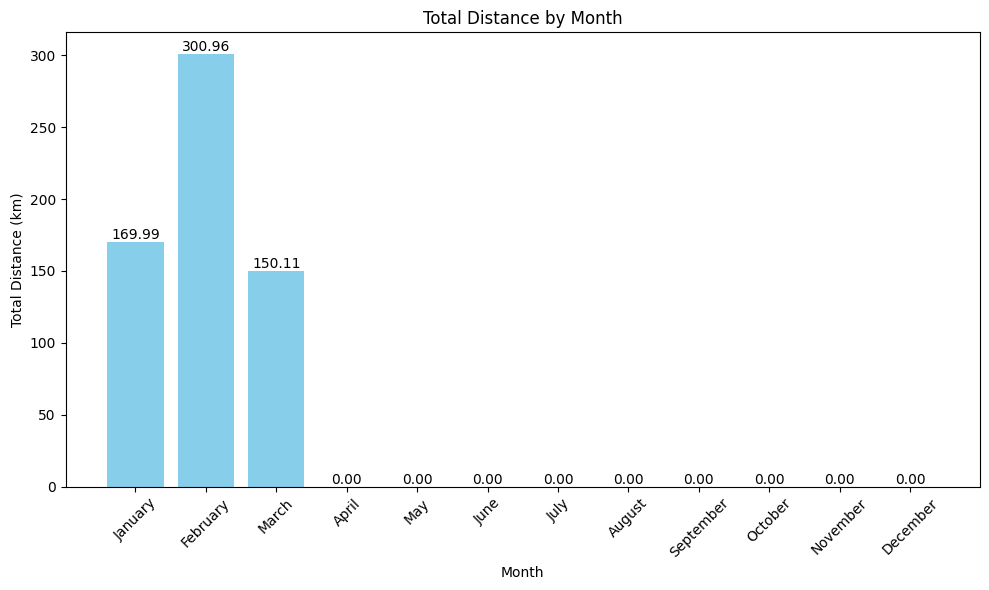

In [411]:
plt.figure(figsize=(10, 6))
bars = plt.bar(
  monthly_distances['Month'], 
  monthly_distances['Distance(km)'], 
  color='skyblue'
)

plt.xlabel('Month')
plt.ylabel('Total Distance (km)')
plt.title('Total Distance by Month')

for bar in bars:
  height = bar.get_height()
  plt.text(
    bar.get_x() + bar.get_width() / 2, 
    height, 
    f'{height:.2f}', 
    ha='center', va='bottom', fontsize=10
  )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


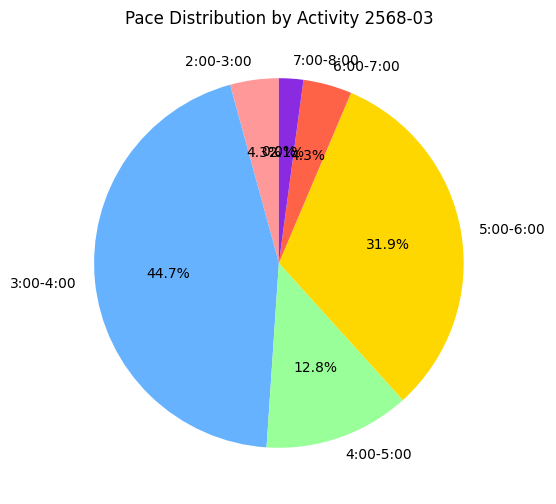

In [412]:
date = "2568-03"
bins = [120, 180, 240, 300, 360, 420, 480, 540]
labels = ["2:00-3:00", "3:00-4:00", "4:00-5:00", "5:00-6:00", "6:00-7:00", "7:00-8:00", "8:00-9:00"]

pie = date_selector(df, date).copy()
pie["Pace Group"] = pd.cut(pie["Pace(sec)"], bins=bins, labels=labels, right=False)
group_counts = pie["Pace Group"].value_counts(sort=False)

plt.figure(figsize=(8, 6))
group_counts.plot.pie(
  autopct="%1.1f%%", 
  startangle=90, 
  colors=["#FF9999", "#66B2FF", "#99FF99", "#FFD700", "#FF6347", "#8A2BE2", "#40E0D0"], 
  labels=group_counts.index
)
plt.title(f"Pace Distribution by Activity {date}")
plt.ylabel("")
plt.show()

In [413]:
pie

,Date,Energy (kcal),Activity,Distance(km),Duration(s),Heart rate: Average(min),Heart rate: Maximum(min),Pace(sec),Pace(min),Duration(min),Pace Group
560,2568-03-01 07:26:19 - 07:32:55,61.528,outdoor,1.117,396.0,125.000,125.0,354.521038,5:54,6:36,5:00-6:00
561,2568-03-01 07:45:37 - 08:18:06,456.747,outdoor,6.925,1949.0,157.667,168.0,281.444043,4:41,32:29,4:00-5:00
563,2568-03-01 17:34:05 - 18:00:07,284.033,outdoor,5.051,1562.0,139.000,148.0,309.245694,5:09,26:02,5:00-6:00
564,2568-03-01 18:10:13 - 18:27:44,330.349,outdoor,5.000,1051.0,147.000,147.0,210.200000,3:30,17:31,3:00-4:00
565,2568-03-01 18:35:36 - 18:38:34,34.720,outdoor,0.504,178.0,0.000,0.0,353.174603,5:53,2:58,5:00-6:00
566,2568-03-03 17:20:53 - 17:37:07,187.564,outdoor,3.014,974.0,134.000,134.0,323.158593,5:23,16:14,5:00-6:00
567,2568-03-04 17:48:26 - 18:14:48,281.140,outdoor,5.025,1582.0,132.333,140.0,314.825871,5:14,26:22,5:00-6:00
568,2568-03-04 18:27:49 - 18:32:16,81.020,outdoor,1.281,267.0,138.000,138.0,208.430913,3:28,4:27,3:00-4:00
569,2568-03-04 18:37:17 - 18:41:55,84.639,outdoor,1.289,278.0,154.000,154.0,215.671063,3:35,4:38,3:00-4:00
570,2568-03-04 18:47:55 - 18:52:27,82.055,outdoor,1.280,272.0,145.000,145.0,212.500000,3:32,4:32,3:00-4:00


In [414]:
distance_by_pace = pie.groupby("Pace Group", observed=False)["Distance(km)"].sum()
distance_by_pace_df = distance_by_pace.reset_index()
distance_by_pace_df.columns = ["Pace Group", "Total Distance (km)"]
total_distance = pie["Distance(km)"].sum()
distance_by_pace_df["Percentage (%)"] = (distance_by_pace_df["Total Distance (km)"] / total_distance) * 100

distance_by_pace_df


,Pace Group,Total Distance (km),Percentage (%)
0,2:00-3:00,0.826,0.550278
1,3:00-4:00,47.977,31.962080
2,4:00-5:00,24.483,16.310474
3,5:00-6:00,67.405,44.904934
4,6:00-7:00,8.608,5.734614
5,7:00-8:00,0.807,0.537620
6,8:00-9:00,0.000,0.000000


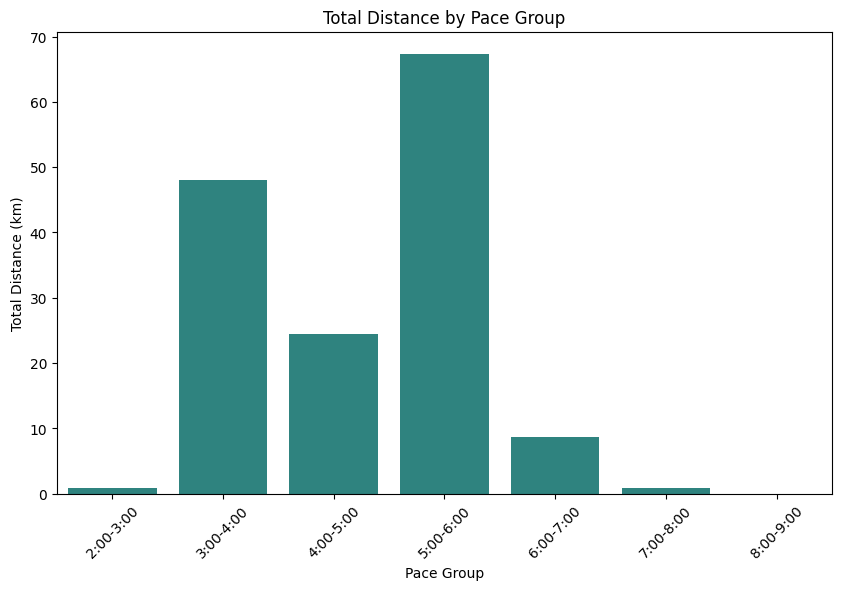

In [415]:
plt.figure(figsize=(10, 6))

sns.barplot(
  x="Pace Group", 
  y="Total Distance (km)", 
  data=distance_by_pace_df, 
  palette="viridis", 
  hue=False, 
  legend=False
)

plt.xlabel("Pace Group")
plt.ylabel("Total Distance (km)")
plt.title("Total Distance by Pace Group")
plt.xticks(rotation=45)

plt.show()

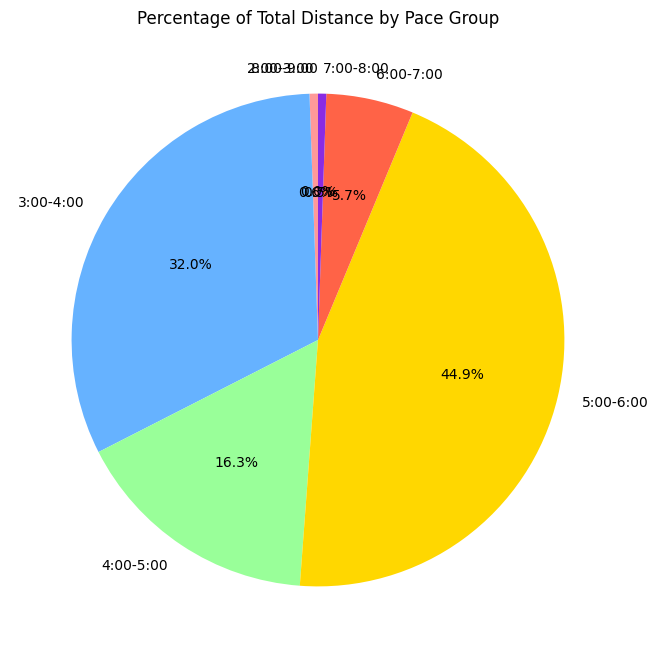

In [416]:
colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFD700", "#FF6347", "#8A2BE2", "#40E0D0"]

plt.figure(figsize=(8, 8))
plt.pie(
  distance_by_pace_df["Percentage (%)"], 
  labels=distance_by_pace_df["Pace Group"], 
  autopct="%1.1f%%", 
  startangle=90, 
  colors=colors, 
)

plt.title("Percentage of Total Distance by Pace Group")
plt.show()

In [417]:
def pace_table(data) -> str:
  fastest_pace = df.loc[data]

  table_data = {
    'Date': [fastest_pace['Date']],
    'Energy (kcal)': [fastest_pace['Energy (kcal)']],
    'Activity': [fastest_pace['Activity']],
    'Distance(km)': [fastest_pace['Distance(km)']],
    'Duration(s)': [fastest_pace['Duration(s)']],
    'Pace(min)': [fastest_pace['Pace(min)']],
    'Pace(sec)': [fastest_pace['Pace(sec)']],
    'Heart rate: Average(min)': [fastest_pace['Heart rate: Average(min)']],
    'Heart rate: Maximum(min)': [fastest_pace['Heart rate: Maximum(min)']]
  }

  return tabulate(table_data, headers='keys', tablefmt='pretty')

In [418]:
fastest_pace_outdoor = outdoor['Pace(sec)'].idxmin()
fastest_pace_indoor = indoor['Pace(sec)'].idxmin()

fastest_outdoor_pace_table = df.loc[fastest_pace_outdoor]
fastest_indoor_pace_table = df.loc[fastest_pace_indoor]

print('The fastest pace outdoor')
print(fastest_outdoor_pace_table)
print()

print('The fastest pace indoor')
print(fastest_indoor_pace_table)

The fastest pace outdoor
Date                        2568-02-06 18:46:42 - 18:47:52
Energy (kcal)                                       18.787
Activity                                           outdoor
Distance(km)                                         0.421
Duration(s)                                           70.0
Heart rate: Average(min)                               0.0
Heart rate: Maximum(min)                               0.0
Pace(sec)                                       166.270784
Pace(min)                                             2:46
Duration(min)                                         1:10
Name: 454, dtype: object

The fastest pace indoor
Date                        2567-09-18 18:39:21 - 18:43:10
Energy (kcal)                                        57.59
Activity                                            indoor
Distance(km)                                         1.022
Duration(s)                                         219.26
Heart rate: Average(min)                

In [419]:
distance = df['Distance(km)'].sum()
print(f'Overall {distance:.2f} km')

Overall 2368.32 km


In [420]:
fastest5k = run5k['Pace(min)'].idxmin()
print("Fatest of 5 KM.")
run5k.loc[fastest5k]

Fatest of 5 KM.


Date                        2568-03-01 18:10:13 - 18:27:44
Energy (kcal)                                      330.349
Activity                                           outdoor
Distance(km)                                           5.0
Duration(s)                                         1051.0
Heart rate: Average(min)                             147.0
Heart rate: Maximum(min)                             147.0
Pace(sec)                                            210.2
Pace(min)                                             3:30
Duration(min)                                        17:31
Name: 564, dtype: object

In [421]:
fastest7k = run7k['Pace(min)'].idxmin()
print("Fatest of 7 KM.")
run7k.loc[fastest7k]

Fatest of 7 KM.


Date                        2568-02-20 18:53:40 - 19:21:19
Energy (kcal)                                      483.823
Activity                                           outdoor
Distance(km)                                         7.023
Duration(s)                                         1659.0
Heart rate: Average(min)                             150.0
Heart rate: Maximum(min)                             167.0
Pace(sec)                                       236.223836
Pace(min)                                             3:56
Duration(min)                                        27:39
Name: 527, dtype: object

In [422]:
fastest10k = run10k['Pace(min)'].idxmin()
print("Fatest of 10 KM.")
run10k.loc[fastest10k]

Fatest of 10 KM.


Date                        2566-12-23 17:24:30 - 18:13:01
Energy (kcal)                                      529.661
Activity                                           outdoor
Distance(km)                                        10.052
Duration(s)                                       2848.219
Heart rate: Average(min)                           182.775
Heart rate: Maximum(min)                             194.0
Pace(sec)                                       283.348488
Pace(min)                                             4:43
Duration(min)                                        47:28
Name: 58, dtype: object

In [423]:
start = '2567-10'
end = '2567-12'
quarterly_running = df[(df['Date'] >= start) & (df['Date'] <= end + '-31')]
quarterly_running_day = quarterly_running['Date'].apply(only_date).nunique()
quarterly_distance_running = quarterly_running['Distance(km)'].sum()

print(f'Duration {start} to {end}')
print(quarterly_running_day, 'days')
print(len(quarterly_running), 'runs')
print(f'{quarterly_distance_running:.2f} km')

Duration 2567-10 to 2567-12
41 days
88 runs
422.85 km


In [424]:
year = '2567'
year_running = date_selector(df, year)
year_running_day = year_running['Date'].apply(only_date).nunique()
year_distance_running = year_running['Distance(km)'].sum()

print(f'Year {year}')
print(year_running_day, 'days')
print(len(year_running), 'runs')
print(f'{year_distance_running:.2f} km')

Year 2567
178 days
299 runs
1430.76 km


In [425]:
print('Data on', date)

distance = 'Distance(km)'
indoor = 'indoor'
pace = 'Pace(sec)'
outdoor = 'outdoor'

running = date_selector(df, date)
running_day = running['Date'].apply(only_date).nunique()


def mean(column: str):
  return mean_column(running, column)

def find_best_data_column(activity: str, column: str):
  activity_condition = (running['Activity'] == activity)
  distance_condition = (running[distance] >= 5)
  condition = activity_condition & distance_condition
  filtered_df = running[condition][column]
  try:
    if column == pace:
      return filtered_df.idxmin()
    
    return filtered_df.idxmax()
  except: return None

def best_loc_data(idx, column: str) -> DataFrame:
  if idx is None:
    return None
  if column == pace:
    return sec_to_min(running.loc[idx][column])
  
  return running.loc[idx][column]

avg_distance = mean(distance)
avg_duration = sec_to_min(mean('Duration(s)'))
avg_pace = sec_to_min(mean(pace))
avg_heart_rate = mean('Heart rate: Average(min)')
avg_max_heart_rate = mean('Heart rate: Maximum(min)')

id_fastest_pace_indoor = find_best_data_column(indoor, pace)
fastest_pace_indoor = best_loc_data(id_fastest_pace_indoor, pace)
id_fastest_pace_outdoor = find_best_data_column(outdoor, pace)
fastest_pace_outdoor = best_loc_data(id_fastest_pace_outdoor, pace)


id_longest_distance_indoor = find_best_data_column(indoor, distance)
longest_distance_indoor = best_loc_data(id_longest_distance_indoor, distance)
id_longest_distance_outdoor = find_best_data_column(outdoor, distance)
longest_distance_outdoor = best_loc_data(id_longest_distance_outdoor, distance)

all_distance = running['Distance(km)'].sum()

print(running_day, 'days')
print(len(running), 'runs')
print(f'{all_distance:.2f} km')
print()
print('Fastest run indoor pace', fastest_pace_indoor, 'km')
print('Fastest run outdoor pace', fastest_pace_outdoor, 'km')
print()
print('Longest distance indoor', longest_distance_indoor, 'km')
print('Longest distance outdoor', longest_distance_outdoor, 'km')
print()
print('Average distance', avg_distance, 'km')
print('Average time', avg_duration, 'min')
print('Average pace', avg_pace, 'min')
print('Average heart rate', avg_heart_rate, 'per min')
print('Average max heart rate', avg_max_heart_rate, 'per min')

Data on 2568-03
17 days
47 runs
150.11 km

Fastest run indoor pace None km
Fastest run outdoor pace 3:30 km

Longest distance indoor None km
Longest distance outdoor 11.016 km

Average distance 3.19 km
Average time 15:27 min
Average pace 4:29 min
Average heart rate 110.21 per min
Average max heart rate 114.13 per min
